In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,order_id,product,quantity_ordered,price_each,total_price,order_date,month,day,weekday,hour,purchase_address,street,city,state,zip_code,year
0,147268,Wired Headphones,1.0,11.99,11.99,2019-01-01 03:07:00,1,1,Tuesday,3,"9 Lake St, New York City, NY 10001",9 Lake St,New York City,NY,10001,2019
1,148041,USB-C Charging Cable,1.0,11.95,11.95,2019-01-01 03:40:00,1,1,Tuesday,3,"760 Church St, San Francisco, CA 94016",760 Church St,San Francisco,CA,94016,2019
2,149343,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-01 04:56:00,1,1,Tuesday,4,"735 5th St, New York City, NY 10001",735 5th St,New York City,NY,10001,2019
3,149964,AAA Batteries (4-pack),1.0,2.99,2.99,2019-01-01 05:53:00,1,1,Tuesday,5,"75 Jackson St, Dallas, TX 75001",75 Jackson St,Dallas,TX,75001,2019
4,149350,USB-C Charging Cable,2.0,11.95,23.90,2019-01-01 06:03:00,1,1,Tuesday,6,"943 2nd St, Atlanta, GA 30301",943 2nd St,Atlanta,GA,30301,2019


In [14]:
# New Datatypes
columns_data_types = ['object', 'category', 'int', 'float', 'datetime64', 'object']
convert_dict = {"product": 'category',
                "quantity_ordered": 'float',
                "price_each": 'float', 
                "order_date": 'datetime64[ns]'
                }

# Update df to not containing any of "Quantity Ordered" in quantity_ordered column
df = df[~(df.quantity_ordered == "Quantity Ordered")]
df = df.astype(convert_dict)

# Stakeholder Questions and Answers

## 1. Top 5 Selling Products
### Question:
"Can you provide a detailed list of the top 5 selling products on our platform?"
### Answer:
Certainly! The top 5 selling products on our platform are:
1. Macbook Pro Laptop
2. iPhone
3. ThinkPad Laptop	
4. Google Phone
5. 27in 4K Gaming Monitor	
   - These products consistently outperform others in terms of sales.

/tmp/ipykernel_26715/2873111885.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_sales = df.groupby('product')['total_price'].sum().sort_values(ascending=False).reset_index()


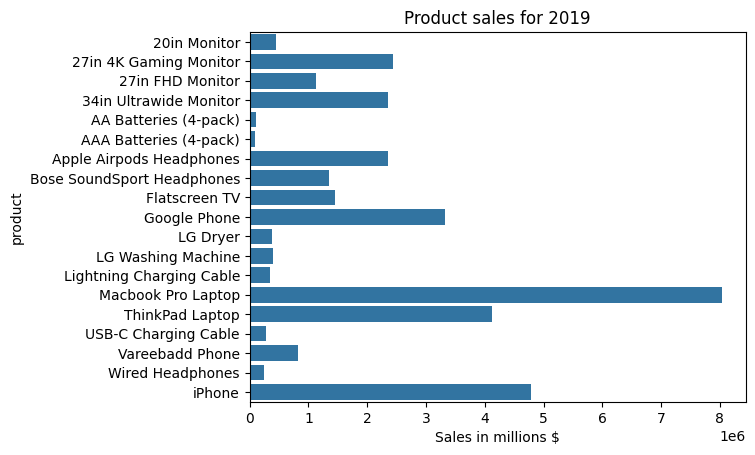

In [15]:
product_sales = df.groupby('product')['total_price'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=product_sales, y='product', x='total_price')
plt.title("Product sales for 2019")
plt.xlabel("Sales in millions $")
plt.show()

In [16]:
df['quarter'] = df.order_date.dt.quarter

## 2. Profitability and Best-Selling Products by Quarter
### Question:
"Which quarter is the most profitable, and which products sell best during that period?"
### Answer:
The most profitable quarter is the last quarter of the year. During this period, the top-selling products remain consistent, with laptops, phones, and monitors leading in sales.

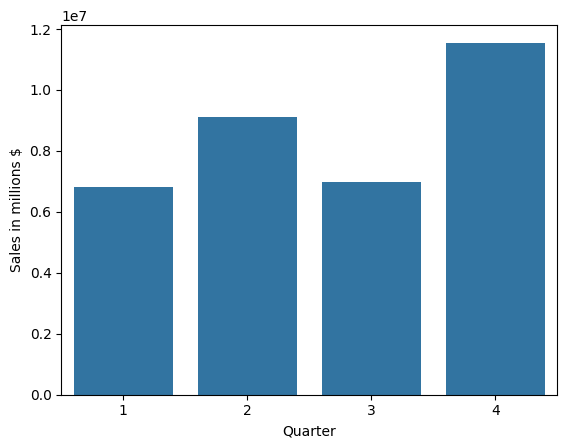

In [17]:
quarter = df.groupby('quarter')['total_price'].sum().reset_index()

sns.barplot(data=quarter, x='quarter', y='total_price')
plt.ylabel("Sales in millions $")
plt.xlabel('Quarter')
plt.show()

/tmp/ipykernel_26715/2153979645.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_product = df.groupby(['quarter', 'product']).agg(total_sales=('total_price', 'sum')).reset_index()
/tmp/ipykernel_26715/2153979645.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_quarter = sales_by_product.groupby('quarter').apply(lambda x: x.nlargest(3, 'total_sales')).reset_index(drop=True)


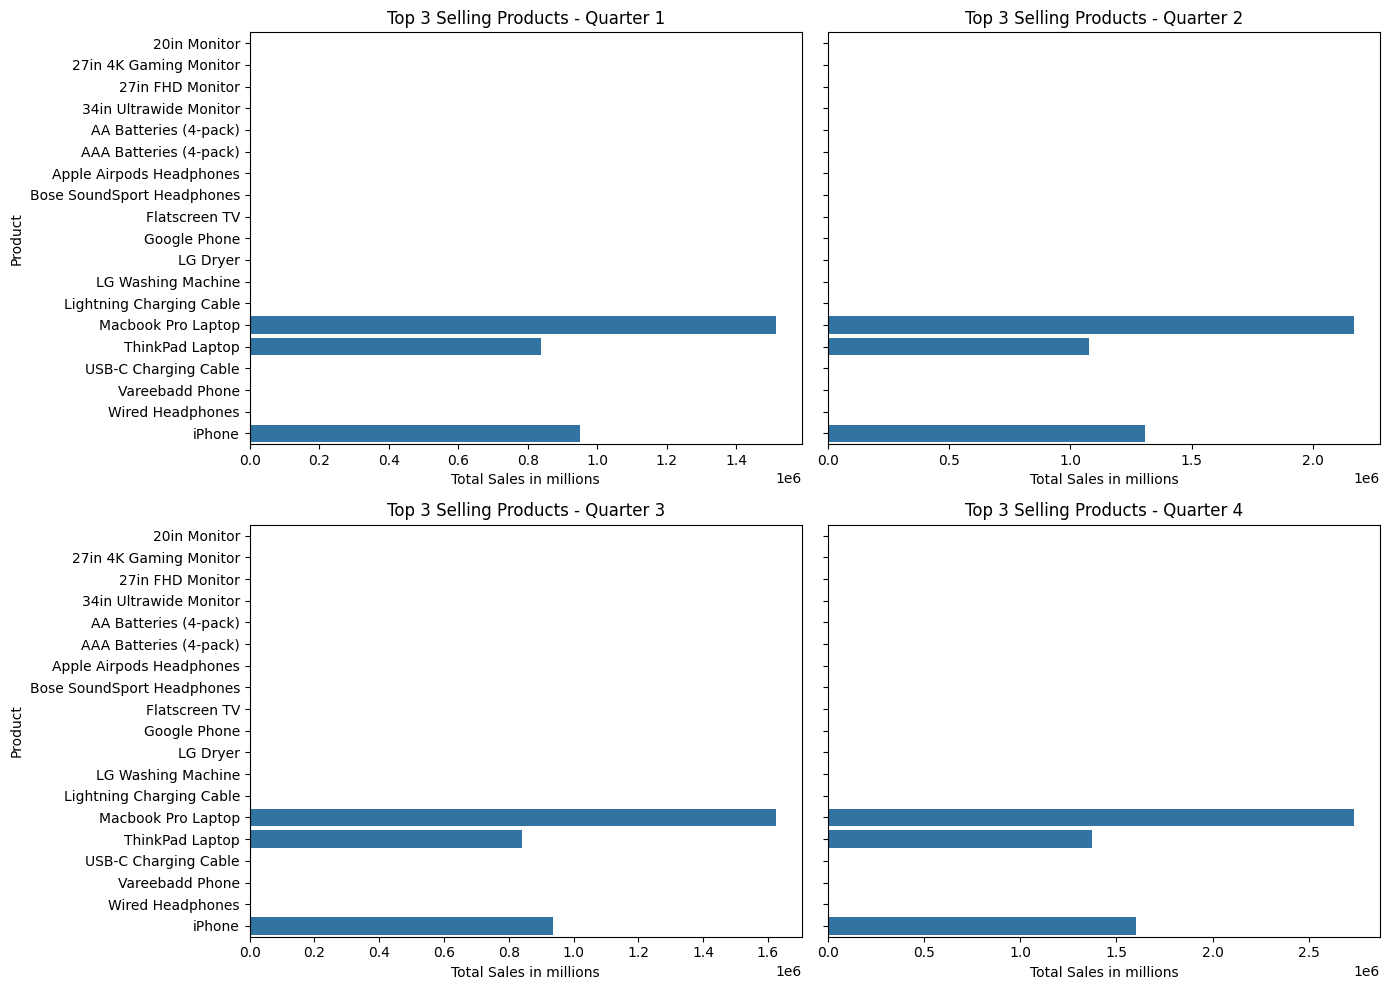

In [18]:
# Calculate total sales for each product in each quarter
sales_by_product = df.groupby(['quarter', 'product']).agg(total_sales=('total_price', 'sum')).reset_index()

# Identify the top 3 selling products for each quarter
top_products_by_quarter = sales_by_product.groupby('quarter').apply(lambda x: x.nlargest(3, 'total_sales')).reset_index(drop=True)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharey=True)

# Iterate over each quarter and create a bar plot
for i, (quarter, data) in enumerate(top_products_by_quarter.groupby('quarter')):
    row, col = divmod(i, 2)
    sns.barplot(x='total_sales', y='product', data=data, ax=axes[row, col], orient='h')
    axes[row, col].set_title(f'Top 3 Selling Products - Quarter {quarter}')
    axes[row, col].set_xlabel('Total Sales in millions')
    axes[row, col].set_ylabel('Product')

plt.tight_layout()
plt.show()

## 3. Optimal Times for Displaying Ads
### Question:
"What data supports the conclusion that 12 noon and 7 p.m. are the best times to display ads?"
### Answer:
The conclusion is based on the analysis of customer visits to the site. Peaks in site visits consistently occur around 12 noon and 7 p.m. This data suggests that these hours are optimal for displaying ads to maximize user engagement.

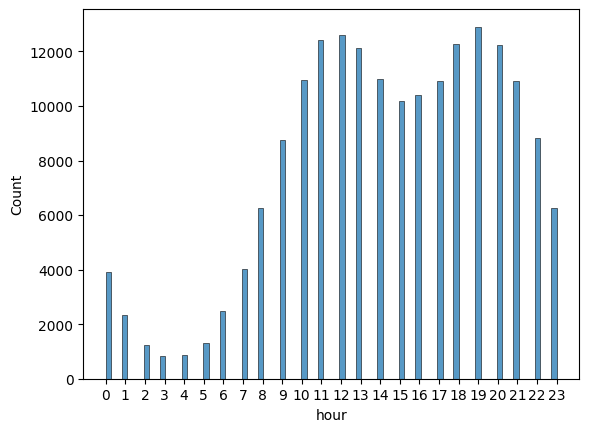

In [19]:
sns.histplot(data=df, x='hour')
plt.xticks(range(24))
plt.show()

## 4. Cities and States with the Most Sales
### Question:
"Can you provide a breakdown of sales in the top cities and states, including specific figures?"
### Answer:
Certainly! The top cities with the most sales are:
1. San Francisco, California
2. Los Angeles, California
3. New York City, New York
   - These cities contribute significantly to our overall sales, and we can explore further growth opportunities in other regions.

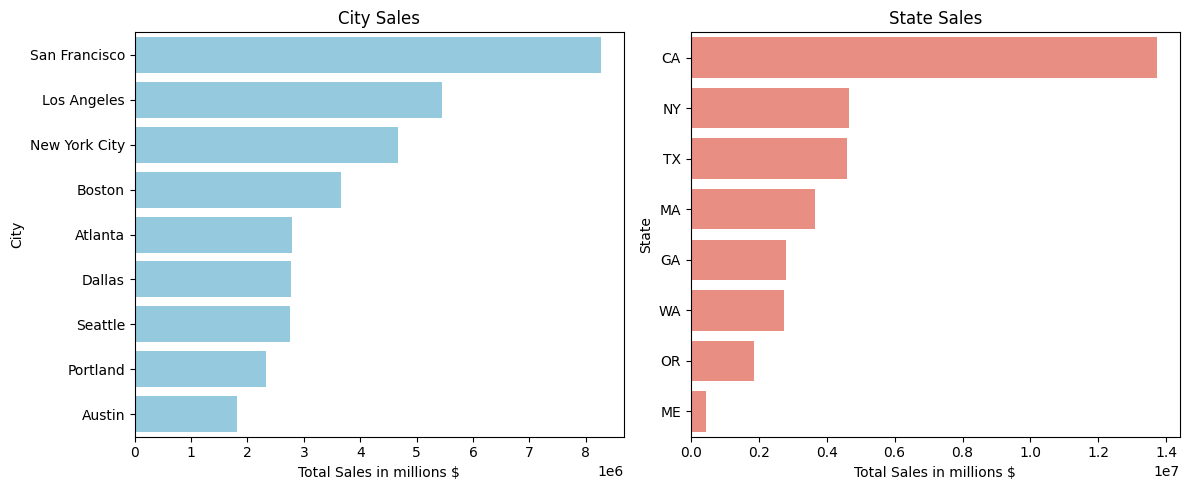

In [20]:
top_cities = df.groupby("city")['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
top_states = df.groupby("state")['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Bar plot for city sales
sns.barplot(x='total_price', y='city', data=top_cities, ax=axes[0], color='skyblue')
axes[0].set_title('City Sales')
axes[0].set_xlabel('Total Sales in millions $')
axes[0].set_ylabel('City')

# Bar plot for state sales
sns.barplot(x='total_price', y='state', data=top_states, ax=axes[1], color='salmon')
axes[1].set_title('State Sales')
axes[1].set_xlabel('Total Sales in millions $')
axes[1].set_ylabel('State')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Sales Analysis Summary and Recommendations

After a comprehensive analysis of our sales data, we have identified key trends and patterns that can guide our strategic decisions. Here are the main conclusions and recommendations:

## 1. Best Selling Products
   - **Conclusion:** Laptops, phones, and monitors are consistently our best-selling products.
   - **Recommendation:** Ensure robust stock levels for these items and consider targeted promotions to maximize sales.

## 2. Most Profitable Quarter
   - **Conclusion:** The last quarter of the year stands out as the most profitable.
   - **Recommendation:** Increase advertising efforts during this period to capitalize on the peak season and boost overall revenue.

## 3. Peak Customer Engagement Hours
   - **Conclusion:** Customer visits to the site peak around 12 noon and 7 p.m.
   - **Recommendation:** Schedule advertisements and promotions during these hours to enhance user engagement and conversion rates.

## 4. Regional Sales Focus
   - **Conclusion:** San Francisco and Los Angeles in California, followed by New York City, are the cities with the most sales.
   - **Recommendation:** Tailor marketing campaigns to target these specific regions for optimized sales performance.

## Overall Strategy
   - **Conclusion:** By strategically aligning our efforts with these identified patterns, we can enhance overall business performance.
   - **Recommendation:** Focus on advertising during the last quarter, especially during peak hours, and prioritize stock management for laptops, phones, and monitors.

In conclusion, leveraging these insights will enable us to refine our advertising strategy, optimize stock levels, and enhance regional targeting. This strategic approach is poised to drive increased sales and revenue for our business.